In [4]:
import pandas as pd
hr = pd.read_csv("HRDataset_v13.csv")
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


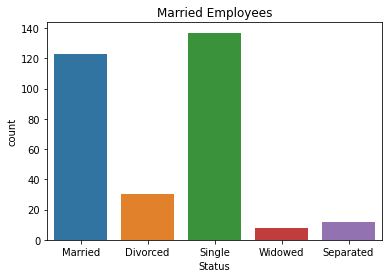

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "MaritalDesc", data = hr)
plt.xlabel("Status")
plt.title("Married Employees")
plt.show()

Text(0.5, 1.0, 'Employee Positions')

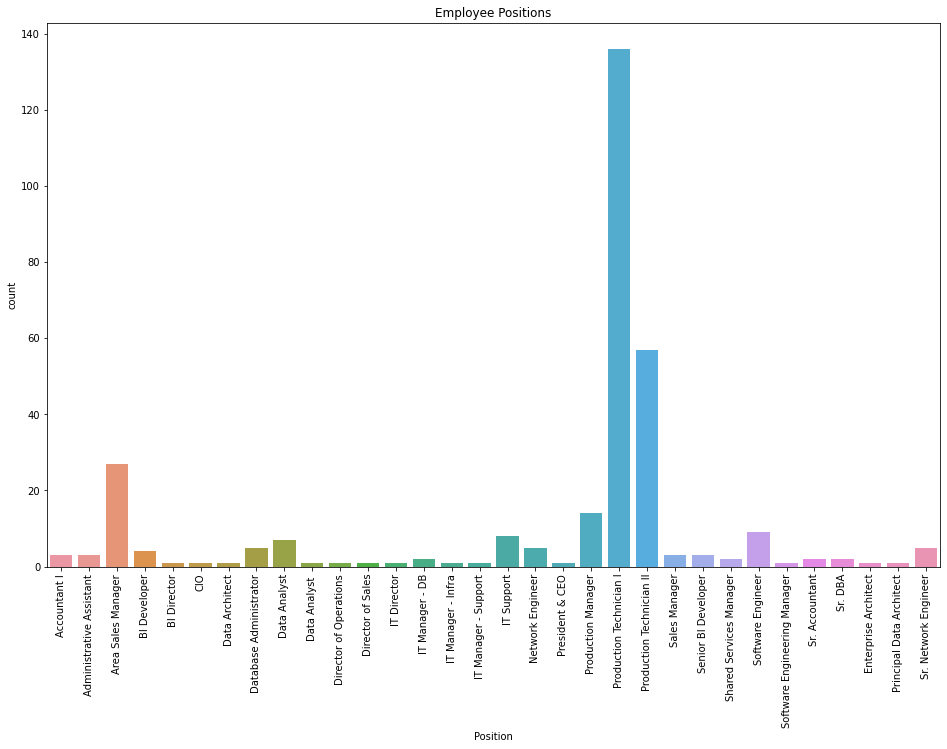

In [18]:
plt.figure(figsize = (16,10))

chart = sns.countplot(x = "Position", data = hr)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

plt.title("Employee Positions")


In [54]:
dob = pd.DataFrame()
dob["dob"] = pd.to_datetime(hr["DOB"][(hr["DateofTermination"].isna())][hr["DOB"].notna()])
dob["today"] = pd.to_datetime(datetime.datetime.now().date())
dob["duration"] = dob["today"] - dob["dob"]
dob.head()


,dob,today,duration
0,1987-11-24,2020-04-25,11841 days
1,1984-04-26,2020-04-25,13148 days
2,1986-09-01,2020-04-25,12290 days
4,1988-05-19,2020-04-25,11664 days
7,2063-05-15,2020-04-25,-15725 days


In [62]:
dob["duration"].astype(int).head()

0    1023062400000000000
1    1135987200000000000
2    1061856000000000000
4    1007769600000000000
7   -1358640000000000000
Name: duration, dtype: int64

Text(0.5, 1.0, 'Employee Age to Payscale with Position Hue')

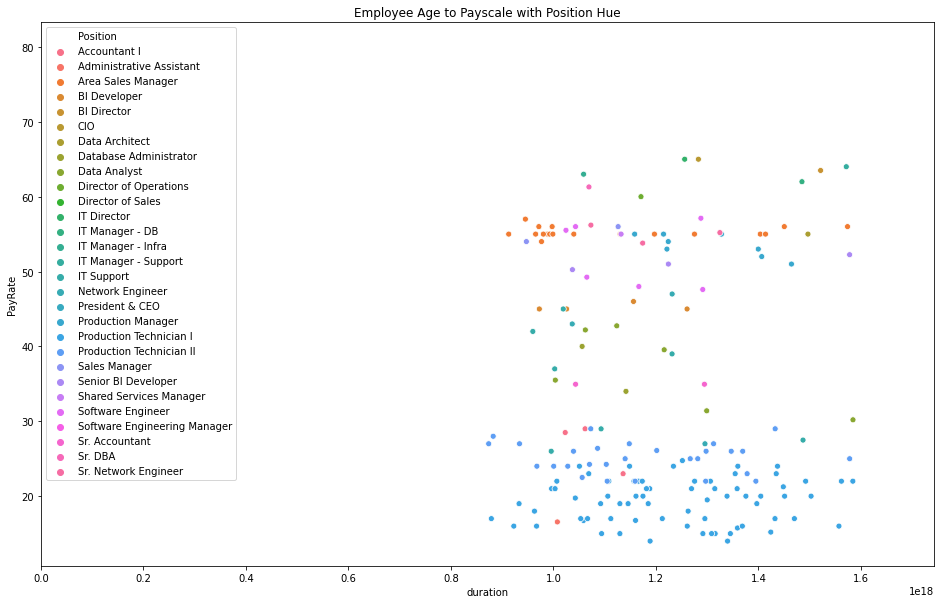

In [95]:
plt.figure(figsize = (16,10))

sns.scatterplot(x = dob["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DOB"].notna()], hue = hr["Position"][hr["DateofTermination"].isna()][hr["DOB"].notna()] )
plt.xlim(0, None)
plt.title("Employee Age to Payscale with Position Hue")



Text(0.5, 1.0, 'Employee Age to Payscale with Gender Hue')

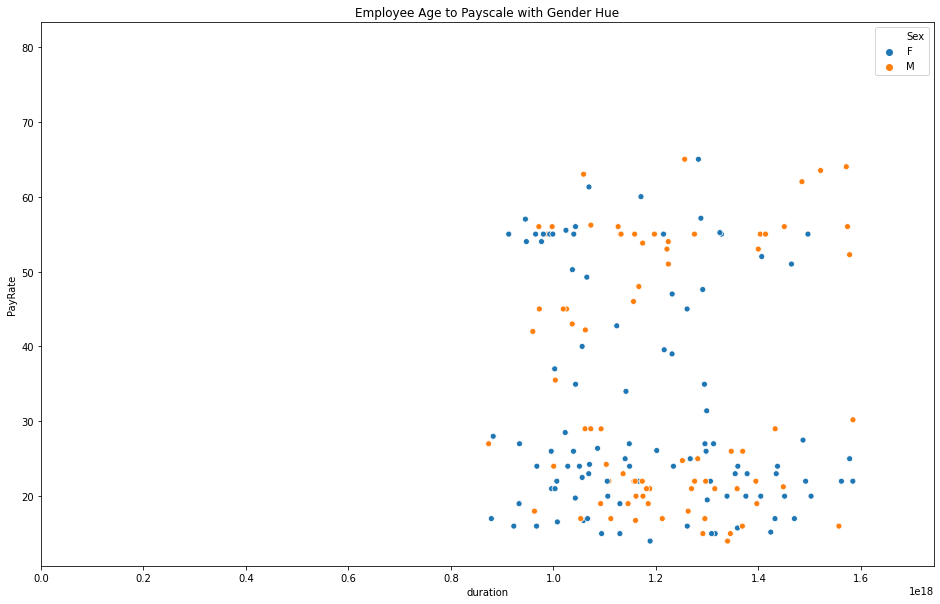

In [96]:
plt.figure(figsize = (16,10))

sns.scatterplot(x = dob["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DOB"].notna()], hue = hr["Sex"][hr["DateofTermination"].isna()][hr["DOB"].notna()] )
plt.xlim(0, None)
plt.title("Employee Age to Payscale with Gender Hue")



Text(0.5, 1.0, 'Gender Distribution')

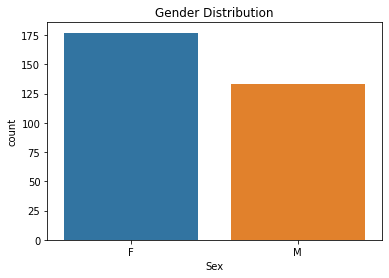

In [75]:

sns.countplot(hr["Sex"])
plt.title("Gender Distribution")

In [70]:
doh = pd.DataFrame()
doh["doh"] = pd.to_datetime(hr["DateofHire"][(hr["DateofTermination"].isna())][hr["DateofHire"].notna()])
doh["today"] = pd.to_datetime(datetime.datetime.now().date())
doh["duration"] = doh["today"] - doh["doh"]
doh.head()

,doh,today,duration
0,2008-10-27,2020-04-25,4198 days
1,2014-01-06,2020-04-25,2301 days
2,2014-09-29,2020-04-25,2035 days
4,2015-05-01,2020-04-25,1821 days
7,2014-08-18,2020-04-25,2077 days


Text(0.5, 1.0, 'Employee Time at company to Payscale with Position Hue')

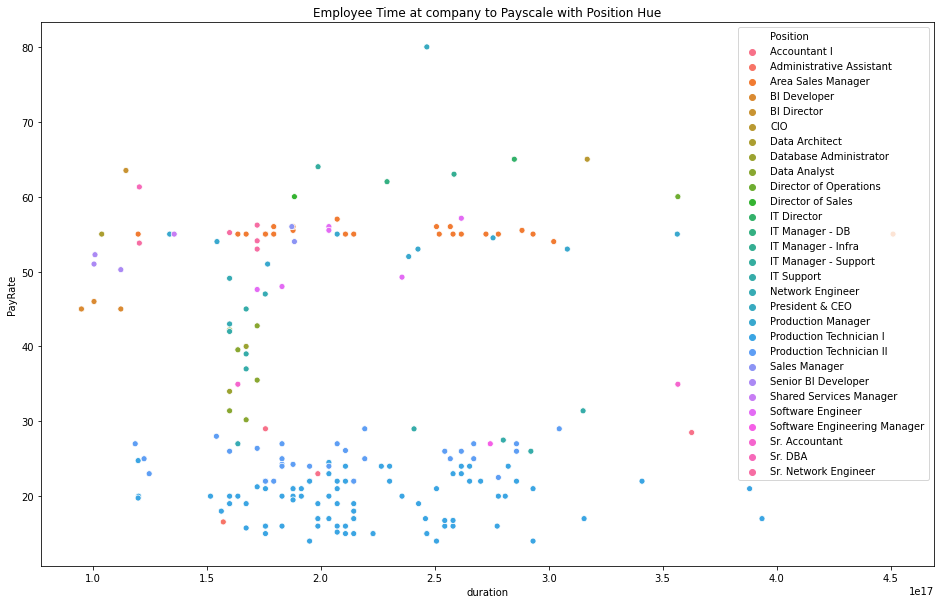

In [97]:
plt.figure(figsize = (16,10))

sns.scatterplot(x = doh["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()], hue = hr["Position"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()] )
plt.title("Employee Time at company to Payscale with Position Hue")


Text(0.5, 1.0, 'Employee Time at company to Payscale with Gender Hue')

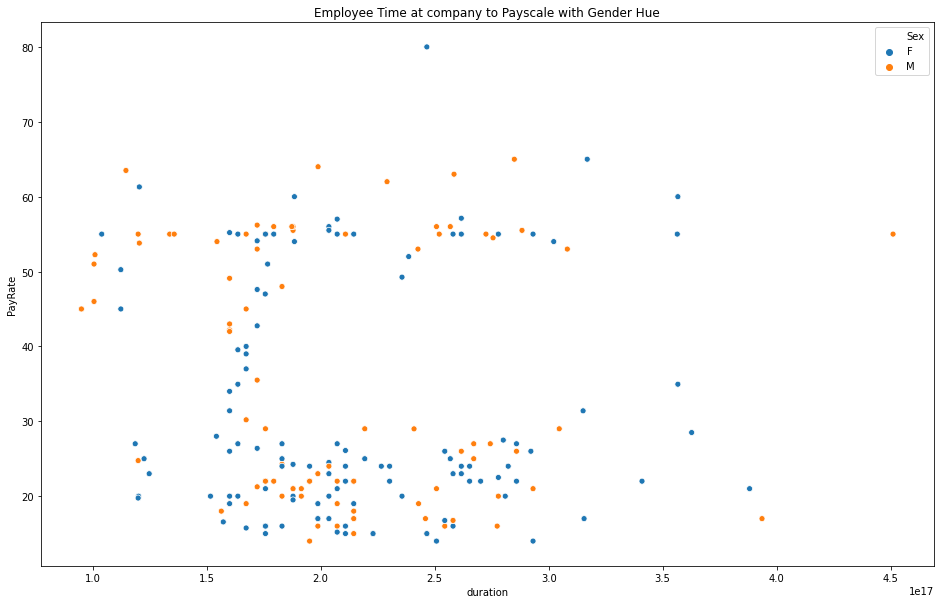

In [98]:
plt.figure(figsize = (16,10))

sns.scatterplot(x = doh["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()], hue = hr["Sex"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()] )
plt.title("Employee Time at company to Payscale with Gender Hue")


Text(0.5, 1.0, 'Employee Time at company to Payscale with Hispanic origin Hue')

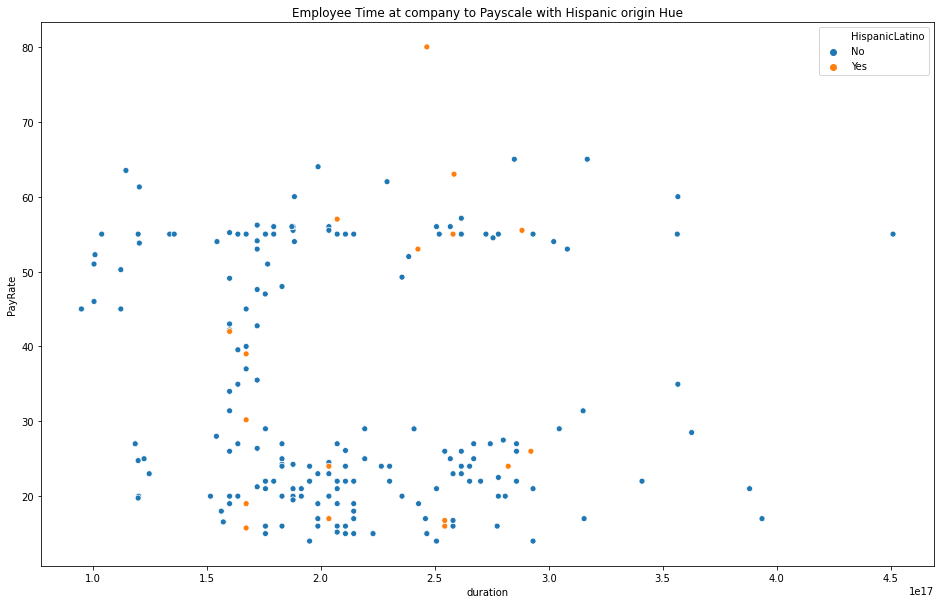

In [99]:
plt.figure(figsize = (16,10))
race_df = hr["HispanicLatino"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()]
race_df.replace("yes", "Yes", inplace = True)
race_df.replace("no", "No", inplace = True)
sns.scatterplot(x = doh["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()], hue = race_df )
plt.title("Employee Time at company to Payscale with Hispanic origin Hue")


Text(0.5, 1.0, 'Count of Hispanic origin employees')

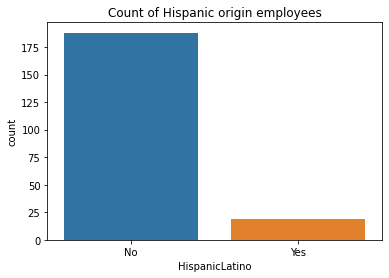

In [80]:

sns.countplot(x = race_df)
plt.title("Count of Hispanic origin employees")

Text(0.5, 1.0, 'Linear regression plot of time at company to payscale')

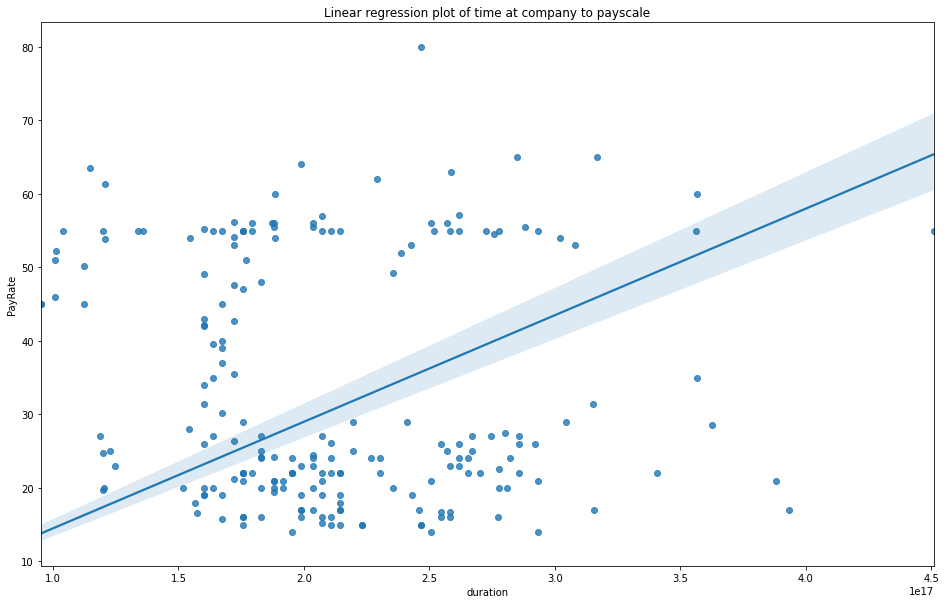

In [82]:
plt.figure(figsize = (16,10))

sns.regplot(x = doh["duration"].astype(int), y = hr["PayRate"][hr["DateofTermination"].isna()][hr["DateofHire"].notna()] )
plt.title("Linear regression plot of time at company to payscale")

Text(0.5, 1.0, 'Pay Scale Distribution')

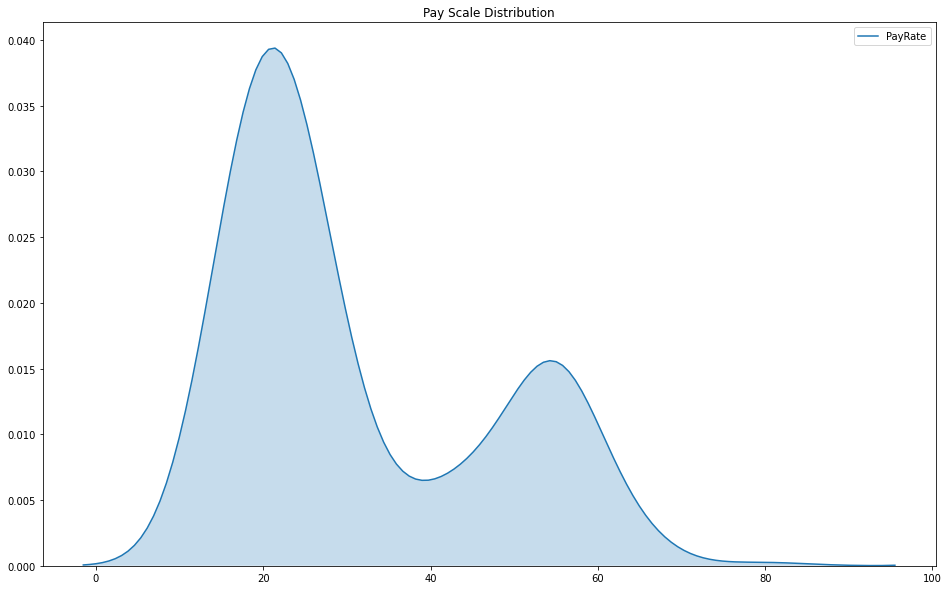

In [91]:
plt.figure(figsize = (16,10))
sns.kdeplot(data = hr['PayRate'], shade = True)
plt.title("Pay Scale Distribution")

Text(0.5, 1.0, 'source of recruitment distributions for employees')

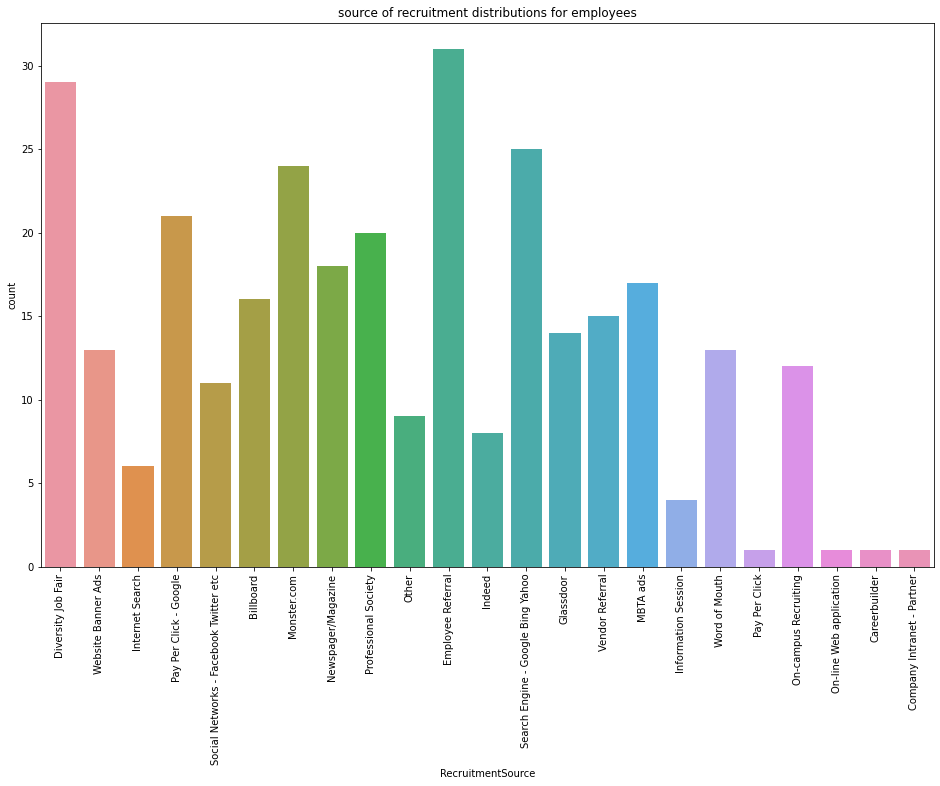

In [94]:
plt.figure(figsize = (16,10))

chart = sns.countplot(x = hr['RecruitmentSource'])


chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title("source of recruitment distributions for employees")

Text(0.5, 1.0, 'Employee Satisfaction Distribution')

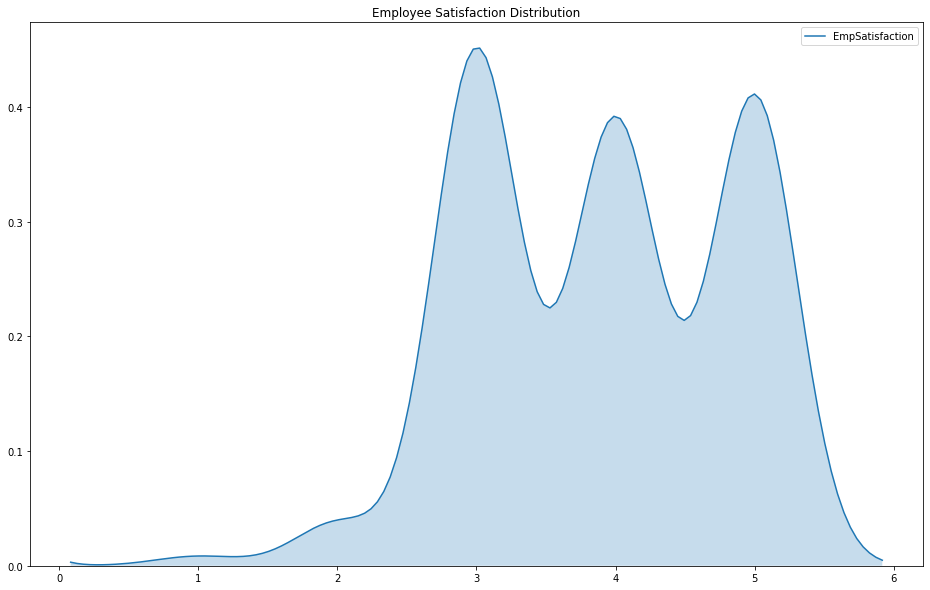

In [101]:
plt.figure(figsize = (16,10))
sns.kdeplot(data = hr['EmpSatisfaction'], shade = True)
plt.title("Employee Satisfaction Distribution")

Text(0.5, 1.0, 'Employee Engagement Distribution')

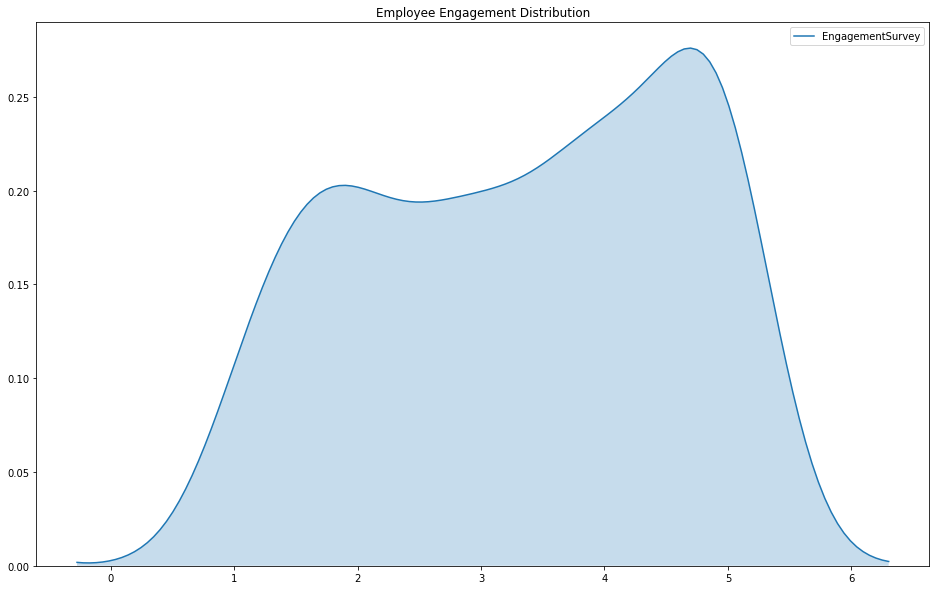

In [102]:
plt.figure(figsize = (16,10))
sns.kdeplot(data = hr['EngagementSurvey'], shade = True)
plt.title("Employee Engagement Distribution")

Text(0.5, 1.0, 'Special Projects Distribution')

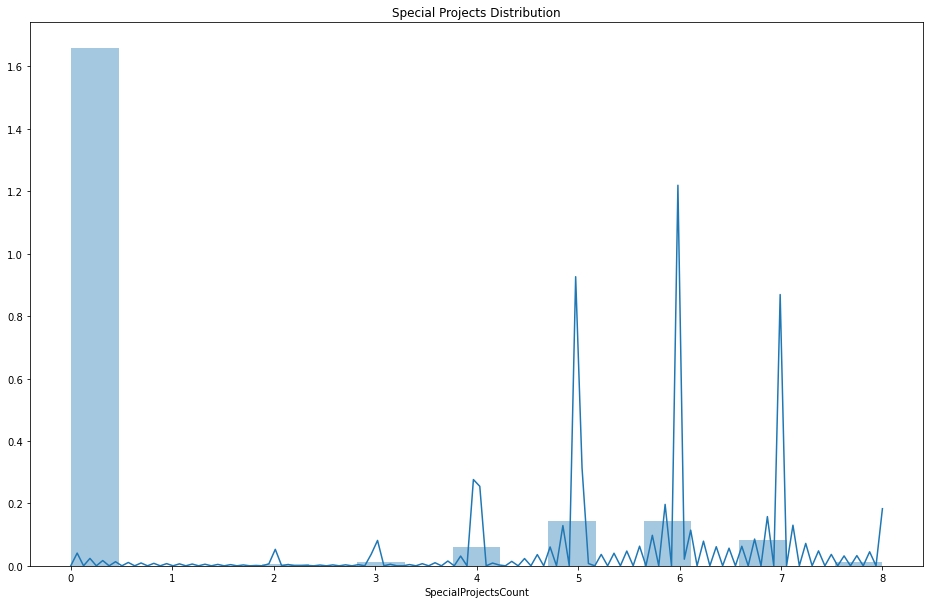

In [118]:
plt.figure(figsize = (16,10))



sns.distplot(a = hr['SpecialProjectsCount'])
plt.title("Special Projects Distribution")


Text(0.5, 1.0, 'Overall Performances')

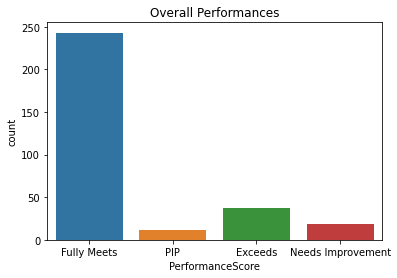

In [105]:
sns.countplot(hr["PerformanceScore"])
plt.title("Overall Performances")

Text(0.5, 1.0, 'Departmentwise Employee distribution')

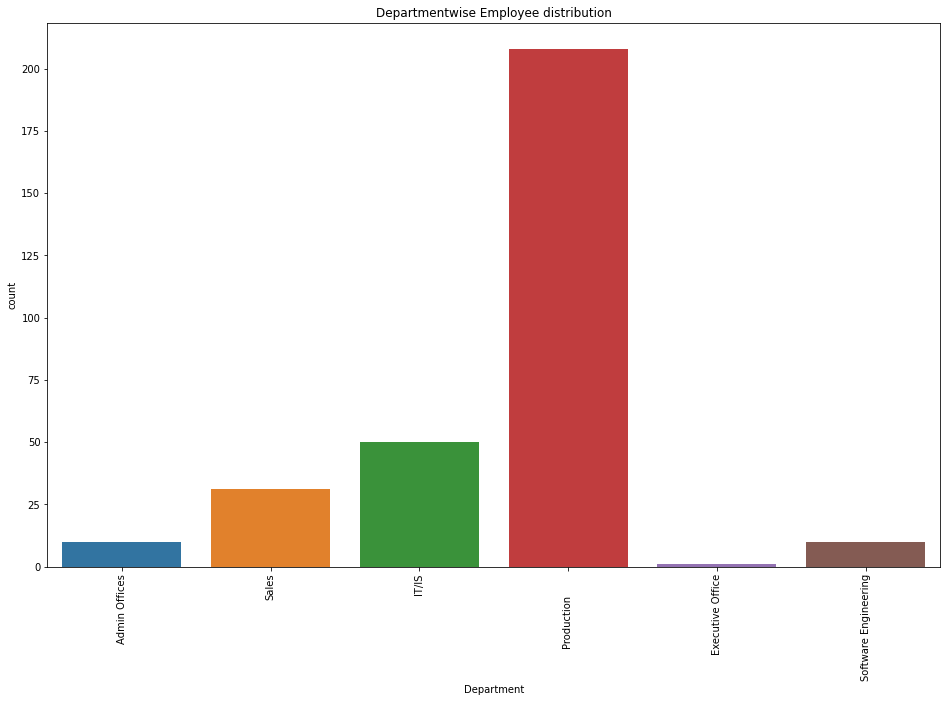

In [112]:
plt.figure(figsize = (16,10))

chart = sns.countplot(hr["Department"])


chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title("Departmentwise Employee distribution")